### Team : Winning_this

* Competition: Network Scenario Prediction Challenge by ITU
* Device used to run this notebook: Google colab, PRO version.

Import Basic Libraries

In [2]:
# import ee
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import random
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings('ignore')

Setup Trainig Data

In [3]:
DATA_PATH  = "/content/drive/MyDrive/Network_traffic/"

In [4]:
train  = pd.read_csv(DATA_PATH +"train.csv")
test  = pd.read_csv(DATA_PATH +"test.csv")

In [10]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [11]:
df=pd.concat([train,test])

In [12]:
del train

In [13]:
del test

In [14]:
df.file  = df.file.astype(str).apply(lambda x:x.split(".")[0]).str.lower()

In [15]:
df['ID'] = df.file +"_" +df.time.astype(str)

Create Lag Features

In [16]:

lag_intervals = [-x for x in range(1, 101, 10)]  # Generate a list of even intervals from 2 to 90,000

# Create an empty DataFrame to store the lag features
lag_df = pd.DataFrame()

for interval in lag_intervals:
    print(f"HERE {interval}")
    # Create lag features for the current interval and add them to lag_df
    lag_df[f'portPktIn_{interval}'] = df.groupby('file')['portPktIn'].shift(interval)

# Concatenate lag_df with the original DataFrame df
df = pd.concat([df, lag_df], axis=1)


HERE -1
HERE -11
HERE -21
HERE -31
HERE -41
HERE -51
HERE -61
HERE -71
HERE -81
HERE -91


In [17]:

lag_intervals = [-x for x in range(1, 301, 10)]  # Generate a list of even intervals from 2 to 90,000

# Create an empty DataFrame to store the lag features
lag_df = pd.DataFrame()

for interval in lag_intervals:
    print(f"HERE {interval}")
    # Create lag features for the current interval and add them to lag_df
    lag_df[f'portPktOut_Lag_{interval}'] = df.groupby('file')['portPktOut'].shift(interval)

# Concatenate lag_df with the original DataFrame df
df = pd.concat([df, lag_df], axis=1)


HERE -1
HERE -11
HERE -21
HERE -31
HERE -41
HERE -51
HERE -61
HERE -71
HERE -81
HERE -91
HERE -101
HERE -111
HERE -121
HERE -131
HERE -141
HERE -151
HERE -161
HERE -171
HERE -181
HERE -191
HERE -201
HERE -211
HERE -221
HERE -231
HERE -241
HERE -251
HERE -261
HERE -271
HERE -281
HERE -291


In [18]:

lag_intervals = [x for x in range(1, 301, 10)]  # Generate a list of even intervals from 2 to 90,000

# Create an empty DataFrame to store the lag features
lag_df = pd.DataFrame()

for interval in lag_intervals:
    print(f"HERE {interval}")
    # Create lag features for the current interval and add them to lag_df
    lag_df[f'portPktOut_Lag_{interval}'] = df.groupby('file')['portPktOut'].shift(interval)

# Concatenate lag_df with the original DataFrame df
df = pd.concat([df, lag_df], axis=1)


HERE 1
HERE 11
HERE 21
HERE 31
HERE 41
HERE 51
HERE 61
HERE 71
HERE 81
HERE 91
HERE 101
HERE 111
HERE 121
HERE 131
HERE 141
HERE 151
HERE 161
HERE 171
HERE 181
HERE 191
HERE 201
HERE 211
HERE 221
HERE 231
HERE 241
HERE 251
HERE 261
HERE 271
HERE 281
HERE 291


In [19]:
del lag_df

In [20]:

lag_intervals = [x for x in range(0, 1500, 100)]  # Generate a list of even intervals from 2 to 90,000

# Create an empty DataFrame to store the lag features
lag_df = pd.DataFrame()

for interval in lag_intervals:
    print(f"HERE {interval}")
    # Create lag features for the current interval and add them to lag_df
    lag_df[f'portPktOut_Lag_{interval}'] = df.groupby('file')['portPktOut'].shift(interval)

# Concatenate lag_df with the original DataFrame df
df = pd.concat([df, lag_df], axis=1)


HERE 0
HERE 100
HERE 200
HERE 300
HERE 400
HERE 500
HERE 600
HERE 700
HERE 800
HERE 900
HERE 1000
HERE 1100
HERE 1200
HERE 1300
HERE 1400


In [21]:
del lag_df

In [22]:

lag_intervals = [-x for x in range(2, 1501, 100)]  # Generate a list of even intervals from 2 to 90,000

# Create an empty DataFrame to store the lag features
lag_df = pd.DataFrame()

for interval in lag_intervals:
    print(f"HERE {interval}")
    # Create lag features for the current interval and add them to lag_df
    lag_df[f'portPktOut_Lag_{interval}'] = df.groupby('file')['portPktOut'].shift(interval)

# Concatenate lag_df with the original DataFrame df
df = pd.concat([df, lag_df], axis=1)
del lag_df

HERE -2
HERE -102
HERE -202
HERE -302
HERE -402
HERE -502
HERE -602
HERE -702
HERE -802
HERE -902
HERE -1002
HERE -1102
HERE -1202
HERE -1302
HERE -1402


In [23]:
# Calculate lag features for 'portPktIn', 'portPktOut', and 'qSize' columns
lag_intervals = [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,50,100,300,500,800,1000,5000,10000,30000,60000,70000,90000]  # Define the time intervals for lag features
for interval in lag_intervals:
    df[f'portPktOut_Lag_{interval}'] = df.groupby('file')['portPktOut'].shift(interval)

In [24]:
lag_intervals = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-11,-12,-15,-30,-50,-600]  # Define the time intervals for lag features
for interval in lag_intervals:
    df[f'portPktOut_Lag_{interval}'] = df.groupby('file')['portPktOut'].shift(interval)

In [26]:
lag_intervals = [1,2,3,4,5,6,7,8,9,10,11,12]  # Define the time intervals for lag features
for interval in lag_intervals:
    df[f'portPktIn_Lag_{interval}'] = df.groupby('file')['portPktIn'].shift(interval)
    df[f'qSize_Lag_{interval}'] = df.groupby('file')['qSize'].shift(interval)

Split Data Into Train and Test

In [33]:
#Get the new dataset
train = df[:ntrain]
test = df[ntrain:]

In [38]:
del df

###### Modelling

In [36]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 18.3 MB/s eta 0:00:00


In [37]:
# fitting on all
from catboost import CatBoostClassifier

model_catboost=CatBoostClassifier(learning_rate=0.2073997778312235,
                                  eval_metric="Accuracy",#cat_features=cat,
                                  task_type = "GPU",
                                  iterations=5000,verbose=50,
                                  reg_lambda = 9,
                                  depth  =5,
                                  use_best_model=True,early_stopping_rounds=100)#cat_features=["hour","duration"])

# Train the model
model_catboost.fit(train.drop(["ID","label","file","time"], axis = 1),train.label,
                   eval_set=[(train.drop(["ID","label","file","time"], axis = 1),train.label,)])

0:	learn: 0.2866328	test: 0.2866328	best: 0.2866328 (0)	total: 613ms	remaining: 51m 5s
50:	learn: 0.6128055	test: 0.6128055	best: 0.6128055 (50)	total: 32.2s	remaining: 52m 7s
100:	learn: 0.6499466	test: 0.6499466	best: 0.6499466 (100)	total: 1m 3s	remaining: 51m 33s
150:	learn: 0.6660522	test: 0.6660522	best: 0.6660522 (150)	total: 1m 35s	remaining: 51m 7s
200:	learn: 0.6748843	test: 0.6748843	best: 0.6748843 (200)	total: 2m 8s	remaining: 50m 57s
250:	learn: 0.6821072	test: 0.6821072	best: 0.6821072 (250)	total: 2m 40s	remaining: 50m 35s
300:	learn: 0.6880296	test: 0.6880296	best: 0.6880296 (300)	total: 3m 13s	remaining: 50m 24s
350:	learn: 0.6923986	test: 0.6923986	best: 0.6923986 (350)	total: 3m 46s	remaining: 49m 55s
400:	learn: 0.6961803	test: 0.6961803	best: 0.6961803 (400)	total: 4m 19s	remaining: 49m 40s
450:	learn: 0.6996926	test: 0.6996926	best: 0.6996926 (450)	total: 4m 53s	remaining: 49m 19s
500:	learn: 0.7028360	test: 0.7028360	best: 0.7028360 (500)	total: 5m 26s	remaining

In [41]:
pred  = model_catboost.predict(test.drop(["ID","label","file","time"], axis = 1))

In [42]:
test["label"] = pred
sub  = test[["ID","label"]]

In [43]:
del test

In [44]:
import numpy as np
sub['label']=sub['label'].astype(np.int8)

In [45]:
sub.to_csv("ll.csv",index  = False)

###### End.

Checking Feature Importance Plot

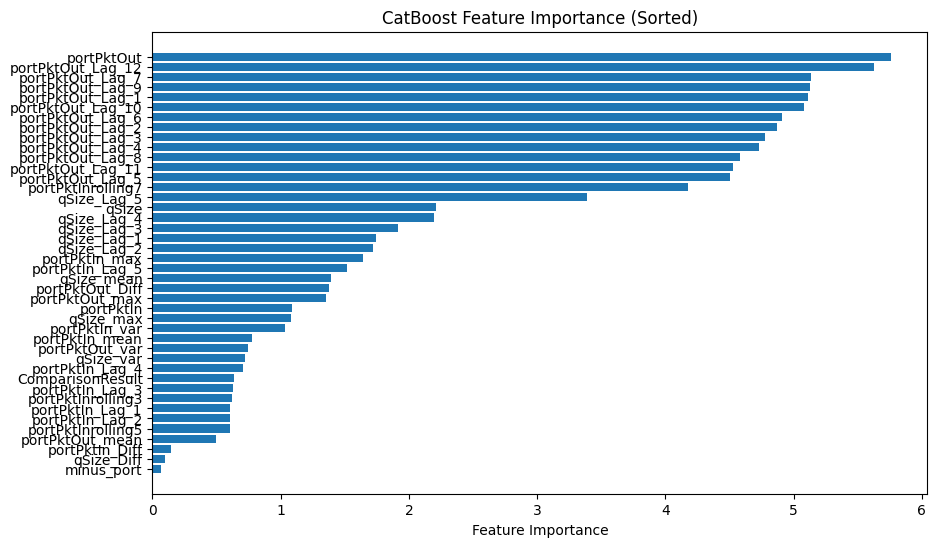

In [ ]:
feature_importance = model_catboost.get_feature_importance()
# Plot feature importance
# feature_importance = model.get_feature_importance()
feature_names = X_train.columns
sorted_indices = feature_importance.argsort()[::-1]  # Sort indices in descending order of importance
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = [feature_importance[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance (Sorted)')
plt.gca().invert_yaxis()
plt.show()
